# CSAL4243: Introduction to Machine Learning
Muhammad Mudassir Khan (mudasssir.khan@ucp.edu.pk)

# Lecture 3: Gradient Descent

### Overview

- [What is Machine Learning?](#what-is-ml)
- [The three different types of machine learning](#The-three-different-types-of-machine-learning)
    - [Supervised Learning](#Supervised-Learning)
- [Machine Learning pipeline](#Machine-Learning-pipeline)
- [Goal of Machine Learning algorithm](#Goal-of-Machine-Learning-algorithm)
- [# Linear Regression with one variable](#Linear-Regression-with-one-variable)
    - [Model Representation](#Model-Representation)
    - [Cost Function](#Cost-Function)
- [Gradient Descent](#Gradient-Descent)
    - [](#)
- [Price of the house yet again?](#Price-of-the-house-yet-again?)
    - [Read data](#Read-data)
    - [Plot data](#Plot-data)
    - [Train Model](#Train-Model)
    - [Predict output using trained model](#Predict-output-using-trained-model)
    - [Plot results](#Plot-results)
- [Resources](#Resources)
- [Credits](#credits)

<br>
<br>

# What is Machine Learning? <a name="what-is-ml"></a> 

* Machine Learning is making computers/machcines learn from data
* Learning improve over time with more data

<br>
<br>

# The three different types of machine learning

<img style="float: left;" src="images/01_01.png", width=500>

<br>
<br>

## Supervised Learning

<img style="float: left;" src="images/01_02.png", width=500>

<br>
<br>

# Machine Learning pipeline

<img style="float: left;" src="images/model.png">

- x is called input variables or input features.

- y is called output or target variable. Also sometimes known as label.

- h is called hypothesis or model. 

- pair (x<sup>(i)</sup>,y<sup>(i)</sup>) is called a sample or training example

- dataset of all training examples is called training set.

- m is the number of samples in a dataset.

- n is the number of features in a dataset excluding label.

<img style="float: left;" src="images/02_02.png", width=400> 

<br>
<br>

# Goal of Machine Learning algorithm

- How well the algorithm will perform on unseen data. 
- Also called generalization.

<br>
<br>

# Linear Regression with one variable

## Model Representation

- Model is represented by h<sub>$\theta$</sub>(x) or simply h(x)

- For Linear regression with one input variable h(x) =  $\theta$<sub>0</sub> + $\theta$<sub>1</sub>x

<img style="float: left;" src="images/02_01.png">

- $\theta$<sub>0</sub> and $\theta$<sub>1</sub> are called weights or parameters.
- Need to find $\theta$<sub>0</sub> and $\theta$<sub>1</sub> that maximizes the performance of model.

<br>

<br>
<br>

## Cost Function

Let $\hat{y}$ = h(x) =  $\theta$<sub>0</sub> + $\theta$<sub>1</sub>x

Error in single sample (x,y) = $\hat{y}$ - y = h(x) - y 

Cummulative error of all m samples = $\sum_{i=1}^{m} (h(x^i) - y^i)^2$

Finally mean error or cost function = J($\theta$) = $\frac{1}{2m}\sum_{i=1}^{m} (h(x^i) - y^i)^2$

<img style="float: left;" src="images/03_01.png", width=300> <img style="float: right;" src="images/03_02.png", width=300>

<br>
<br>

# Gradient Descent


<img style="float: left;" src="images/03_05.png" width = 500>
<img style="float: left;" src="images/03_04.gif" width = 700>

<br>
## Gradient descent equation

<img src="images/03_06.png" width = 500>

- $\alpha$ is called learning rate that control the step size.

<br>
## Derivative Part

<img style="float: left;" src="images/03_09.png" width = 500>

<br>
## Learning Rate $\alpha$

<img style="float: left;" src="images/03_10.png" width = 500>

<br>
## Convergence of Gradient Descent

<img style="float: left;" src="images/03_11.png" width = 500>

---
<br>
<br>
# Gradient Descent for Linear Regression


Cost function:

J($\theta$) = $\frac{1}{2m}\sum_{i=1}^{m} (h(x^i) - y^i)^2$

Gradient descent equation:

$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1)$

---

<br>
Replacing J($\theta$) for each j

\begin{align*} \text{repeat until convergence: } \lbrace & \newline \theta_0 := & \theta_0 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m}(h_\theta(x_{i}) - y_{i}) \newline \theta_1 := & \theta_1 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m}\left((h_\theta(x_{i}) - y_{i}) x_{i}\right) \newline \rbrace& \end{align*}

---

## Deriving $\frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1)$
<img src="images/03_12.png" width = 500>

---

<br>
<br>

# Price of the house yet again? 

## Read data

In [170]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

# read data in pandas frame
dataframe = pd.read_csv('datasets/house_dataset1.csv')

# assign x and y
X = np.array(dataframe[['Size']])
y = np.array(dataframe[['Price']])

m = y.size # number of training examples
#Insert the usual column of 1's into the "X" matrix
X = np.insert(X,0,1,axis=1)

In [171]:
# check data by printing first few rows
dataframe.head()

,Size,Price
0,2104,399900
1,1600,329900
2,2400,369000
3,1416,232000
4,3000,539900


## Plot data

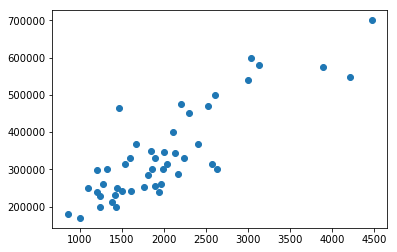

In [172]:
#visualize results
plt.scatter(X[:,1], y)
plt.show()

## Initialize hyper parameters

In [173]:
iterations = 1500
alpha = 0.000000001

## Model 

In [174]:
def h(theta,X): #Linear hypothesis function
    return np.dot(X,theta)

## Cost Function

In [175]:
def computeCost(mytheta,X,y): #Cost function
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    y is a matrix with m- rows and 1 column
    """
    #note to self: *.shape is (rows, columns)
    return float((1./(2*m)) * np.dot((h(mytheta,X)-y).T,(h(mytheta,X)-y)))

#Test that running computeCost with 0's as theta returns 65591548106.45744:
initial_theta = np.zeros((X.shape[1],1)) #(theta is a vector with n rows and 1 columns (if X has n features) )
print (computeCost(initial_theta,X,y))

65591548106.45744


## Gradient Descent function

In [176]:
#Actual gradient descent minimizing routine
def descendGradient(X, theta_start = np.zeros(2)):
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    """
    theta = theta_start
    jvec = [] #Used to plot cost as function of iteration
    thetahistory = [] #Used to visualize the minimization path later on
    for meaninglessvariable in range(iterations):
        tmptheta = theta
        # append for plotting
        jvec.append(computeCost(theta,X,y))
        thetahistory.append(list(theta[:,0]))
        #Simultaneously updating theta values
        for j in range(len(tmptheta)):
            tmptheta[j] = theta[j] - (alpha/m)*np.sum((h(theta,X) - y)*np.array(X[:,j]).reshape(m,1))
        theta = tmptheta
    return theta, thetahistory, jvec

## Run Gradient descent

In [177]:
#Actually run gradient descent to get the best-fit theta values
initial_theta = np.zeros((X.shape[1],1))
theta, thetahistory, jvec = descendGradient(X,initial_theta)


## Plot convergence

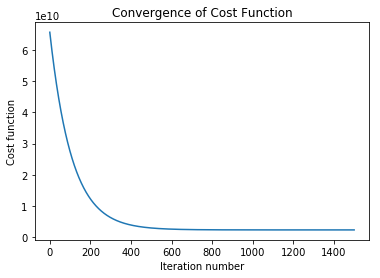

In [178]:
plt.plot(jvec)
plt.title("Convergence of Cost Function")
plt.xlabel("Iteration number")
plt.ylabel("Cost function")
plt.show()

## Predict output using trained model

In [179]:
hx = h(theta, X)

## Plot results

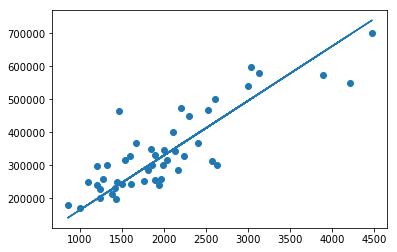

In [180]:
plt.scatter(X[:,1], y)
plt.plot(X[:,1], hx)
plt.show()

# Resources

Course website: [https://w4zir.github.io/ml17s/](https://w4zir.github.io/ml17s/)

[Course resources](https://github.com/w4zir/ml17s)

# Credits
Raschka, Sebastian. Python machine learning. Birmingham, UK: Packt Publishing, 2015. Print.

[Andrew Ng, Machine Learning, Coursera](#https://www.coursera.org/learn/machine-learning)